We compute the log loss function for different weights and plot the form of it. We also check its minimum value and where it is.

In [1]:
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.graph_objs as go
import numpy as np

import matplotlib.pyplot as plt

np.random.seed(2210)
%matplotlib inline

In [2]:
N = 10000
p = 1000*np.random.rand(N)
E = p + np.random.rand(N)

In [3]:
X = np.column_stack((p, E))
Y = (E - p)
Y = (Y > 0.5).astype('float32')

In [4]:
N_points = 200
lim = 6.0
d = np.linspace(-lim, lim, num=N_points)
loss = np.zeros(shape=(N_points, N_points))

In [5]:
def sigmoid(logits):
    return 1./(1.+np.exp(-logits))

In [6]:
def logloss(predicts,labels,eps=1e-15):
    predicts = np.minimum(np.maximum(predicts,eps),1.-eps)
    return -np.mean(labels*np.log(predicts)+(1.-labels)*np.log(1.-predicts)) 

In [7]:
for i in range(N_points):
    if i%50 == 0:
        print(i)
    for j in range(N_points):
        logits = d[i]*X[:,0] + d[j]*X[:,1] - 0.5
        loss[j, i] = logloss(sigmoid(logits), Y,eps=1e-7)

0


/usr/local/lib/python3.5/dist-packages/ipykernel/__main__.py:2: RuntimeWarning:

overflow encountered in exp



50
100
150


In [8]:
np.save("logloss.npy",loss)

In [9]:
loss = np.load("logloss.npy")

In [10]:
loss.min()

0.50312706540724295

In [11]:
np.unravel_index(loss.argmin(), loss.shape)

(142, 57)

In [12]:
print(d[142],d[57])

2.56281407035 -2.56281407035


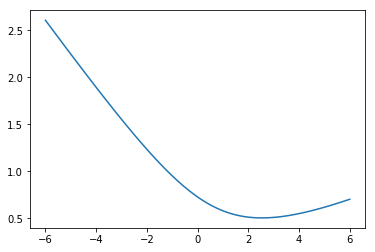

In [13]:
plt.plot(d,loss[np.isclose(d,-d[:,np.newaxis])])

In [14]:
data = [
    go.Surface(
        x=d,
        y=d,
        z=loss
    )
]

In [15]:
layout = go.Layout(scene = go.Scene(xaxis=go.XAxis(title='Weight 1',range=[-lim, lim]),
                            yaxis=go.YAxis(title='Weight 2',range=[-lim, lim]),
                           zaxis=dict(title='Logloss')
                                   )
                  )

In [16]:
fig = go.Figure(data=data, layout=layout)

In [17]:
init_notebook_mode(connected=True)

In [18]:
iplot(fig)

Value for our initial condition.

In [19]:
logits =  1.18792784*X[:,0] -1.18661654*X[:,1]-0.24475364

In [21]:
logloss(sigmoid(logits),Y,eps=1e-7)

0.87688649886704606